In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import pickle
from sklearn.metrics import classification_report
from sklearn import metrics

In [2]:
dPath = Path("../docs/dumps")

In [3]:
with open(dPath / "valid_data.pkl", 'rb') as filename:
    valid_data = pickle.load(filename)

In [4]:
with open(dPath / "test_data.pkl", 'rb') as filename:
    test_data = pickle.load(filename)

In [5]:
X_valid = valid_data.drop("Detected", axis=1)

In [6]:
y_valid = valid_data.Detected

In [7]:
X_test = test_data.drop("Detected", axis=1)

In [8]:
y_test = test_data.Detected

In [9]:
with open(dPath / "rf_exp_07_names.pkl", 'rb') as filename:
    names = pickle.load(filename)

In [10]:
X_valid = X_valid[names]

In [11]:
X_test = X_test[names]

In [12]:
X_test.head()

,numExecuted,MutatorClass,numAssertInTC,numTestCover,numAssertInTM,ppavcc,cchalsteadCumulativeBugs,cchalsteadCumulativeVolume,ppRVF,ppnumberOfMethods,...,cchalsteadEffort,ccmaintainabilityIndexNC,mmhalsteadVocabulary,pptcc,mmexternalMethodsCalled,ppinstability,ppmaxcc,mmhalsteadEffort,mmvariablesReferenced,ccunweightedClassSize
0,32,MemberVariableMutator,2,16,2,1.258065,0.996047,2988.139644,16.0,31.0,...,31594.065211,117.568525,12.0,39.0,0.0,0.6,3.0,245.928428,1.0,12.0
1,1,NonVoidMethodCallMutator,2,1,1,1.258065,0.996047,2988.139644,16.0,31.0,...,31594.065211,117.568525,16.0,39.0,1.0,0.6,3.0,306.000000,1.0,12.0
2,1,ReturnValsMutator,2,1,1,1.258065,0.996047,2988.139644,16.0,31.0,...,31594.065211,117.568525,16.0,39.0,1.0,0.6,3.0,306.000000,1.0,12.0
3,1,NonVoidMethodCallMutator,2,1,1,1.258065,0.996047,2988.139644,16.0,31.0,...,31594.065211,117.568525,12.0,39.0,1.0,0.6,3.0,163.115794,0.0,12.0
4,1,ReturnValsMutator,2,1,1,1.258065,0.996047,2988.139644,16.0,31.0,...,31594.065211,117.568525,12.0,39.0,1.0,0.6,3.0,163.115794,0.0,12.0


In [13]:
with open(dPath / "mutclslabels.pkl", 'rb') as filename:
    mutclslabels = pickle.load(filename)

In [14]:
with open(dPath / "retypelabels.pkl", 'rb') as filename:
    retypelabels = pickle.load(filename)

In [15]:
mutclscodes = dict(zip(mutclslabels,range(len(mutclslabels))))

In [16]:
retypecodes = dict(zip(retypelabels,range(len(retypelabels))))

In [17]:
X_test.replace(mutclscodes, inplace=True)

In [18]:
X_test.replace(retypecodes, inplace=True)

In [60]:
with open(dPath / "hgbs_exp_02_preds.pkl", 'rb') as filename:
    hgbs_pred = pickle.load(filename)

In [44]:
with open(dPath / "rf_exp_08_preds.pkl", 'rb') as filename:
    rf_pred = pickle.load(filename)

In [61]:
print(classification_report(y_test, (rf_pred + hgbs_pred)/2 >=0.50))

              precision    recall  f1-score   support

       False       0.55      0.59      0.57     20633
        True       0.77      0.74      0.75     37843

    accuracy                           0.69     58476
   macro avg       0.66      0.66      0.66     58476
weighted avg       0.69      0.69      0.69     58476



In [62]:
from sklearn.metrics import average_precision_score, precision_score, recall_score
print(average_precision_score(y_test, (rf_pred + hgbs_pred)/2 >= 0.5, average='micro'))

0.7356089475506637


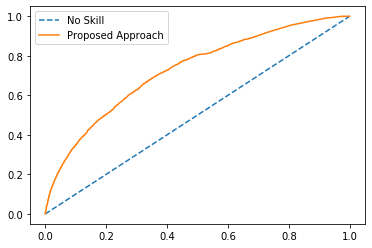

In [63]:
import matplotlib.pyplot as plt
from numpy import sqrt,argmax
fpr, tpr, thresholds = metrics.roc_curve(y_test, (rf_pred + hgbs_pred)/2)
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='Proposed Approach')
plt.legend();

In [64]:
metrics.roc_auc_score(y_test, (rf_pred + hgbs_pred)/2 >= 0.5)

0.6635476627775585

In [65]:
metrics.balanced_accuracy_score(y_test, (rf_pred + hgbs_pred)/2 >= 0.5, adjusted=True)

0.32709532555511744

In [66]:
metrics.matthews_corrcoef(y_test, (rf_pred + hgbs_pred)/2 >= 0.5)

0.3230872517548094

In [67]:
metrics.log_loss(y_test, (rf_pred + hgbs_pred)/2 >= 0.5)

10.826117947505526

In [68]:
metrics.zero_one_loss(y_test, (rf_pred + hgbs_pred)/2 >= 0.5)

0.3134448320678569

In [69]:
np.histogram(rf_pred)

(array([  592,   492,  2462,  7174, 11997, 13966, 10953,  5751,  2895,
         2194], dtype=int64),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

In [70]:
np.histogram(hgbs_pred)

(array([  330,  2020,  3937,  6486,  8149, 10950,  9977,  9766,  5664,
         1197], dtype=int64),
 array([0.04815857, 0.13909316, 0.23002775, 0.32096234, 0.41189693,
        0.50283152, 0.59376611, 0.6847007 , 0.77563529, 0.86656987,
        0.95750446]))